For x = 10.0, y = 1.7
For x = 30.0, y = 1.5
For x = 60.0, y = 0.6
For x = 90.0, y = 0.3


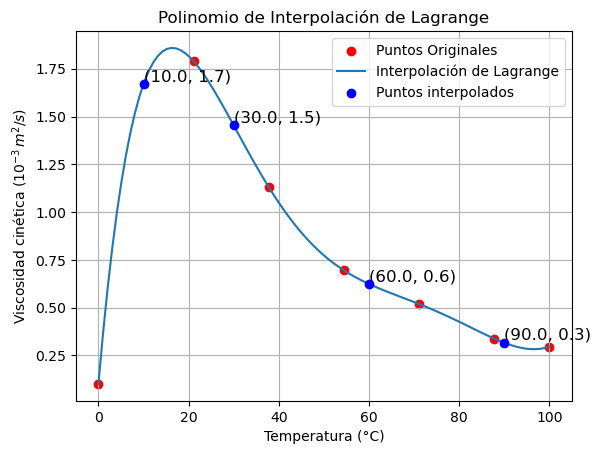

In [11]:
# Autor: Luis Mario Ruelas Heras
# Tarea 3. Analisis Numérico

# Ejercicio 1. Viscosidad cinética...
# Utilice el metodo de su preferencia para interpolar los valores 10, 30, 60 y 90.


import numpy as np
import matplotlib.pyplot as plt

# Definir los puntos
x = [0.0, 21.1, 37.8, 54.4, 71.1, 87.8, 100.0]
y = [0.101, 1.79, 1.13, 0.696, 0.519, 0.338, 0.296]
m = len(x)
n = m - 1

# Función para calcular los polinomios básicos de Lagrange
def lagrange_basis(xp, x_points, i):
    L_i = 1
    for j in range(len(x_points)):
        if j != i:
            L_i *= (xp - x_points[j]) / (x_points[i] - x_points[j])
    return L_i

# Función de interpolación de Lagrange
def lagrange_interpolation(xp, x_points, y_points):
    yp = 0
    for i in range(len(x_points)):
        yp += y_points[i] * lagrange_basis(xp, x_points, i)
    return yp

# Solicitar el valor de x para interpolar
# En este caso necesitamos interpolar cuatro valores. Estos se guardan en una lista para poder graficarlos mas adelante.
xp = [10.0, 30.0, 60.0, 90.0]
# Crear una lista para guardar el valor interpolado relativo a los valores de la lista xp
yp = [0, 0, 0, 0]
# Con el ciclo for calculamos todos los valores interpolados.
for i in range(len(xp)):
    yp[i] = lagrange_interpolation(xp[i], x, y)
    print("For x = %.1f, y = %.1f" % (xp[i], yp[i]))


# Crear puntos para la interpolación
x_interpolado = np.linspace(min(x), max(x), 100)
y_interpolado = [lagrange_interpolation(x_val, x, y) for x_val in x_interpolado]

# Crear figura
# plt.figure(figsize = (6, 6))

# Graficar los puntos originales
plt.scatter(x, y, label="Puntos Originales", color="red")

# Graficar el polinomio de interpolación de Lagrange
plt.plot(
    x_interpolado, y_interpolado, label="Interpolación de Lagrange", linestyle="-"
)

# Graficar los valor interpolados
plt.scatter(xp, yp, color="blue", zorder=5, label='Puntos interpolados')
# Texto iterando sobre xp y yp
for i in range(len(xp)):
    plt.text(xp[i], yp[i], f"({xp[i]:.1f}, {yp[i]:.1f})", fontsize=12, verticalalignment="bottom")


# Añadir etiquetas y leyenda
plt.xlabel("Temperatura (°C)")
plt.ylabel(r"Viscosidad cinética ($10^{-3}\,m^2/s$)")
plt.title("Polinomio de Interpolación de Lagrange")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


Enter x: 10.5
For x = 10.5, y = 0.3


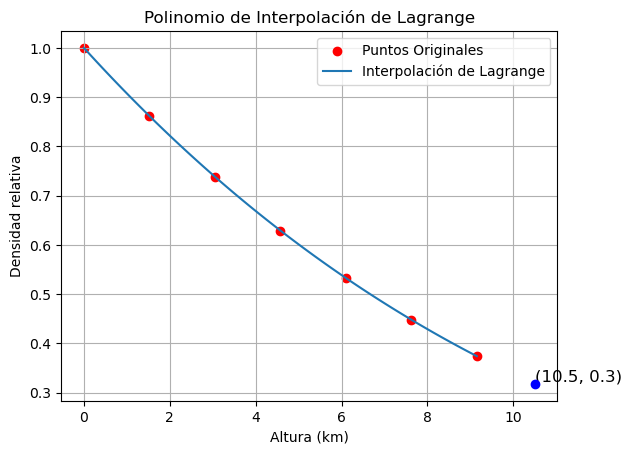

Polinomio de Interpolación de Lagrange:
y(x) = 0.565049180327869*x*(1.2 - 0.131147540983607*x)*(1.25 - 0.163934426229508*x)*(1.33333333333333 - 0.218579234972678*x)*(1.5 - 0.327868852459016*x)*(2.0 - 0.655737704918033*x) + 0.242131147540984*x*(1.5 - 0.163934426229508*x)*(1.66666666666667 - 0.218579234972678*x)*(2.0 - 0.327868852459016*x)*(3.0 - 0.655737704918033*x)*(0.655737704918033*x - 1.0) + 0.137530054644809*x*(2.0 - 0.218579234972678*x)*(2.5 - 0.327868852459016*x)*(4.0 - 0.655737704918033*x)*(0.327868852459016*x - 0.5)*(0.655737704918033*x - 2.0) + 0.087344262295082*x*(3.0 - 0.327868852459016*x)*(5.0 - 0.655737704918033*x)*(0.218579234972678*x - 0.333333333333333)*(0.327868852459016*x - 1.0)*(0.655737704918033*x - 3.0) + 0.0587672131147541*x*(6.0 - 0.655737704918033*x)*(0.163934426229508*x - 0.25)*(0.218579234972678*x - 0.666666666666667)*(0.327868852459016*x - 1.5)*(0.655737704918033*x - 4.0) + 0.0408852459016393*x*(0.131147540983607*x - 0.2)*(0.163934426229508*x - 0.5)*(0.218579

In [8]:
# Ejercicio 2. Densidad relativa del aire en función de la altura. Determinar
# el valor de la densidad relativa del aire a 10.5 km utilizando interpolacion
# de Lagrange

import sympy as sp


def lagrange_1(x_points, y_points, xp):
    """
    Calcula y grafica el polinomio de interpolación de Lagrange.

    Parámetros:
    x_points (list or array): Puntos en el eje x.
    y_points (list or array): Puntos en el eje y.
    xp (float): Punto en el que se desea interpolar.

    Retorna:
    yp (float): Valor interpolado en xp.
    """
    m = len(x_points)
    n = m - 1
    # Definir la variable simbólica
    x = sp.symbols("x")

    # Función para calcular los polinomios básicos de Lagrange
    def lagrange_basis(xp, x_points, i):
        L_i = 1
        for j in range(len(x_points)):
            if j != i:
                L_i *= (xp - x_points[j]) / (x_points[i] - x_points[j])
        return L_i

    # Función para calcular el polinomio de Lagrange
    def lagrange_interpolation(xp, x_points, y_points):
        yp = 0
        for i in range(len(x_points)):
            yp += y_points[i] * lagrange_basis(xp, x_points, i)
        return yp

    # Calcular el valor interpolado
    yp = lagrange_interpolation(xp, x_points, y_points)
    print("For x = %.1f, y = %.1f" % (xp, yp))

    # Crear puntos para la interpolación
    x_interpolado = np.linspace(min(x_points), max(x_points), 100)
    y_interpolado = [
        lagrange_interpolation(x_val, x_points, y_points) for x_val in x_interpolado
    ]

    # Graficar los puntos originales
    plt.scatter(x_points, y_points, label="Puntos Originales", color="red")

    # Graficar el polinomio de interpolación de Lagrange
    plt.plot(
        x_interpolado, y_interpolado, label="Interpolación de Lagrange", linestyle="-"
    )

    # Graficar el valor interpolado
    plt.scatter(xp, yp, color="blue", zorder=5)
    plt.text(xp, yp, f"({xp:.1f}, {yp:.1f})", fontsize=12, verticalalignment="bottom")

    # Añadir etiquetas y leyenda
    # Ajustar las etiquetas para este ejercicio, x: altura, y: densidad relativa
    plt.xlabel("Altura (km)")
    plt.ylabel("Densidad relativa")
    plt.title("Polinomio de Interpolación de Lagrange")
    plt.legend()
    plt.grid(True)

    # Mostrar la gráfica
    plt.show()

    # Construir el polinomio de interpolación simbólicamente
    polinomio = 0
    for i in range(len(x_points)):
        term = y_points[i]
        for j in range(len(x_points)):
            if j != i:
                term *= (x - x_points[j]) / (x_points[i] - x_points[j])
        polinomio += term

    # Simplificar el polinomio
    polinomio_simplificado = sp.simplify(polinomio)

    # Imprimir el polinomio de interpolación
    print("Polinomio de Interpolación de Lagrange:")
    print(f"y(x) = {polinomio}")
    print("\nPolinomio Simplificado:")
    print(f"y(x) = {polinomio_simplificado}")

    return yp


# Escribir los valores de la altura (en kilometros) en x_points
# Escribir los valores de la densidad relativa del aire en y_points
try:
    x_points = [0.0, 1.525, 3.050, 4.575, 6.10, 7.625, 9.150]
    y_points = [1.0, 0.8617, 0.7385, 0.6292, 0.5328, 0.4481, 0.3741]
    xp = float(input("Enter x: ")) # Ingresar el valor buscado. En este caso 10.5
    lagrange_1(x_points, y_points, xp)
except ValueError:
    print("Please insert a valid number")

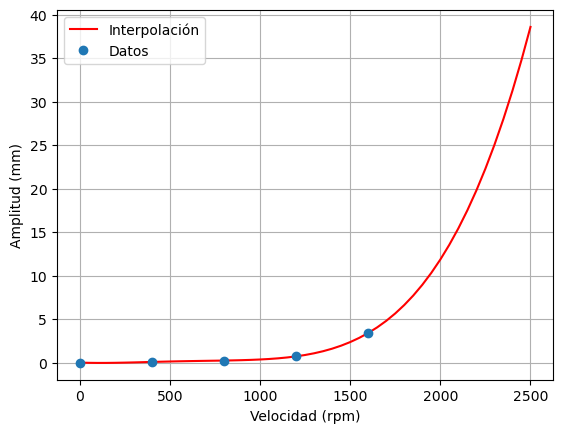

In [7]:
# Ejercicio 3. La amplitud vibracional de un eje de transmision...


# Método de interpolación de Newton


def evalPoly(a, xData, x):  # Función que evalua polinomios de Lagrange
    n = len(xData) - 1  # Grado del polinomio
    p = a[n]
    for k in range(1, n + 1):
        p = a[n - k] + (x - xData[n - k]) * p
    return p


def coeffts(xData, yData):
    m = len(xData)  # Número de datos
    a = yData.copy()
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1]) / (xData[k:m] - xData[k - 1])
    return a

# Escribir los valores de la velocidad (en rpm) en xData
xData = np.array([0.0, 400.0, 800.0, 1200.0, 1600.0])
# Escribir los valores de la amplitud (en mm) en yData
yData = np.array([0.0, 0.072, 0.233, 0.712, 3.400])
coeff = coeffts(xData, yData)

# Definir el intervalo de 0 a 2500 para la velocidad. 
x = np.arange(0, 2501, 50)

plt.plot(x, evalPoly(coeff, xData, x), "r", label="Interpolación")
plt.plot(xData, yData, "o", label="Datos")
plt.xlabel('Velocidad (rpm)')
plt.ylabel('Amplitud (mm)')
plt.legend()
plt.grid()
plt.show()